In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import seaborn as sns

# Step 1: Simulate synthetic funnel data
np.random.seed(42)

user_ids = [f"user_{i}" for i in range(1, 1001)]

stages = ["visit_landing", "view_product", "add_to_cart", "initiate_checkout", "purchase"]

data = []
start_date = datetime(2024, 1, 1)

for user in user_ids:
    timestamp = start_date + timedelta(minutes=np.random.randint(0, 1440))
    for i, stage in enumerate(stages):
        if np.random.rand() > (0.15 * i):  # simulate drop-off
            data.append([user, stage, timestamp])
            timestamp += timedelta(minutes=np.random.randint(1, 30))
        else:
            break

df = pd.DataFrame(data, columns=["user_id", "event", "timestamp"])

<ipython-input-6-fff92240db96>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.5, i, f"{stage} ({funnel_counts[i]})", ha='center', va='center', fontsize=12)


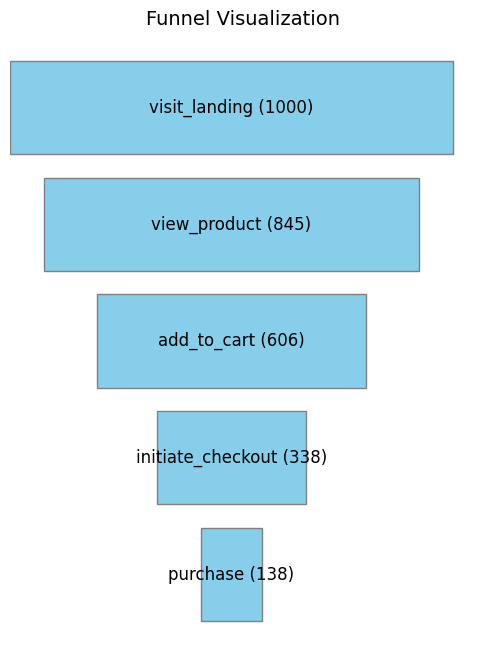

In [6]:
# Mimic funnel shape using horizontal bars and decreasing width
funnel_counts = df.groupby("event")["user_id"].nunique().reindex(stages)

# Normalize widths for funnel effect
max_width = funnel_counts.max()
widths = funnel_counts / max_width

plt.figure(figsize=(6, 8))
for i, (stage, width) in enumerate(zip(stages, widths)):
    plt.barh(y=i, width=width, height=0.8, left=(1 - width) / 2, color='skyblue', edgecolor='gray')
    plt.text(0.5, i, f"{stage} ({funnel_counts[i]})", ha='center', va='center', fontsize=12)

plt.gca().invert_yaxis()
plt.axis('off')
plt.title("Funnel Visualization", fontsize=14)
plt.show()

In [9]:
# Calculate drop-off and conversion rates
funnel_df = pd.DataFrame({
    "Stage": stages,
    "Users": funnel_counts.values
})

funnel_df["Drop-off"] = funnel_df["Users"].shift(1) - funnel_df["Users"]
funnel_df["Conversion Rate (%)"] = funnel_df["Users"].div(funnel_df["Users"].shift(1)) * 100
funnel_df.fillna("-", inplace=True)
funnel_df

<ipython-input-9-fdf01f6dd5bc>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  funnel_df.fillna("-", inplace=True)


,Stage,Users,Drop-off,Conversion Rate (%)
0,visit_landing,1000,-,-
1,view_product,845,155.0,84.5
2,add_to_cart,606,239.0,71.715976
3,initiate_checkout,338,268.0,55.775578
4,purchase,138,200.0,40.828402


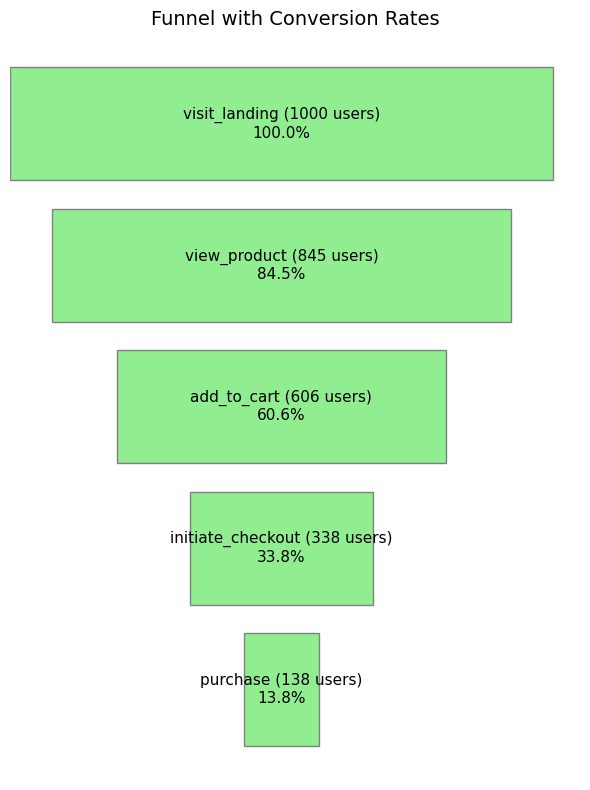

In [8]:
# Reuse funnel_df from Step 3
funnel_counts = df.groupby("event")["user_id"].nunique().reindex(stages)

# Create funnel data with conversion rate labels
funnel_df = pd.DataFrame({
    "Stage": stages,
    "Users": funnel_counts.values
})
funnel_df["Conversion Rate (%)"] = funnel_df["Users"] / funnel_df["Users"].iloc[0] * 100

# Normalize width for funnel effect
max_width = funnel_df["Users"].max()
funnel_df["Width"] = funnel_df["Users"] / max_width

# Plot funnel with conversion rate labels
plt.figure(figsize=(6, 8))
for i, row in funnel_df.iterrows():
    width = row["Width"]
    label = f'{row["Stage"]} ({int(row["Users"])} users)\n{row["Conversion Rate (%)"]:.1f}%'
    plt.barh(y=i, width=width, height=0.8, left=(1 - width) / 2, color='lightgreen', edgecolor='gray')
    plt.text(0.5, i, label, ha='center', va='center', fontsize=11)

plt.gca().invert_yaxis()
plt.axis('off')
plt.title("Funnel with Conversion Rates", fontsize=14)
plt.tight_layout()
plt.show()